Saved figure to: voxel_visualization.png


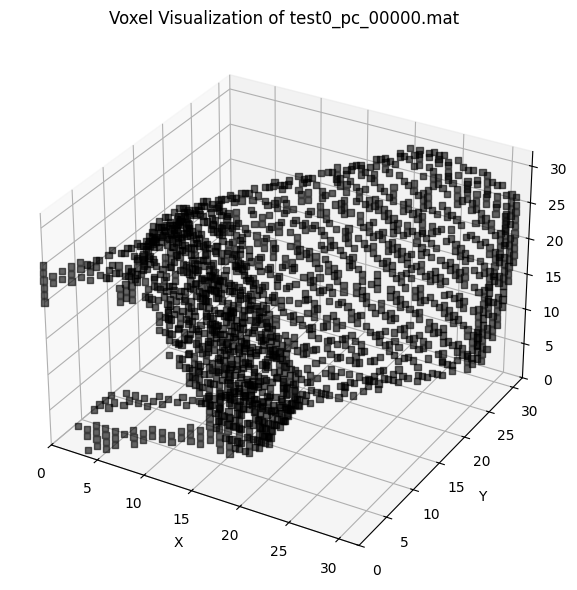

In [4]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

def visualize_voxel_from_mat(mat_path, save_path=None):
    # 加载 .mat 文件
    mat = scipy.io.loadmat(mat_path)
    volume = mat['Volume']  # 体素网格 [32, 32, 32]

    # 获取非零体素的位置
    xs, ys, zs = np.nonzero(volume > 0)

    # 创建图形
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs, ys, zs, marker='s', alpha=0.6, s=20, c='black')

    ax.set_title(f"Voxel Visualization of {os.path.basename(mat_path)}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_xlim(0, 32)
    ax.set_ylim(0, 32)
    ax.set_zlim(0, 32)
    plt.tight_layout()

    # 如果指定了保存路径，则保存图像
    if save_path:
        plt.savefig(save_path, dpi=300)
        print(f"Saved figure to: {save_path}")

    plt.show()

# 示例调用：指定 .mat 文件路径和保存路径
visualize_voxel_from_mat(
    'SNC_valid/test0_pc_00000.mat',
    save_path='voxel_visualization.png'
)


In [5]:
import os
import shutil
from pathlib import Path

def organize_mat_files(source_dir, output_root='SNC'):
    # 遍历所有 .mat 文件
    for mat_file in Path(source_dir).rglob("*.mat"):
        filename = mat_file.name  # 例如 train0_pc_00000.mat
        prefix = filename.split('_pc_')[0]  # 提取如 train0 / test2

        # 决定属于 train/test/val
        if prefix.startswith("train"):
            split_type = "train"
        elif prefix.startswith("test"):
            split_type = "test"
        elif prefix.startswith("val"):
            split_type = "val"
        else:
            print(f"跳过未识别 split 类型的文件: {filename}")
            continue

        # 构造目标路径
        target_folder = Path(output_root) / split_type / prefix
        target_folder.mkdir(parents=True, exist_ok=True)

        # 拷贝文件到新目录
        target_path = target_folder / filename
        shutil.move(str(mat_file), str(target_path))

        print(f"移动: {filename} → {target_path}")

organize_mat_files('SNC_valid', output_root='SNC_valid')


移动: test1_pc_00203.mat → SNC_valid/test/test1/test1_pc_00203.mat
移动: train7_pc_01487.mat → SNC_valid/train/train7/train7_pc_01487.mat
移动: test3_pc_00430.mat → SNC_valid/test/test3/test3_pc_00430.mat
移动: train11_pc_01224.mat → SNC_valid/train/train11/train11_pc_01224.mat
移动: test1_pc_01644.mat → SNC_valid/test/test1/test1_pc_01644.mat
移动: test2_pc_00254.mat → SNC_valid/test/test2/test2_pc_00254.mat
移动: val2_pc_00598.mat → SNC_valid/val/val2/val2_pc_00598.mat
移动: train3_pc_00210.mat → SNC_valid/train/train3/train3_pc_00210.mat
移动: test1_pc_01748.mat → SNC_valid/test/test1/test1_pc_01748.mat
移动: train12_pc_01104.mat → SNC_valid/train/train12/train12_pc_01104.mat
移动: test4_pc_00026.mat → SNC_valid/test/test4/test4_pc_00026.mat
移动: test2_pc_01439.mat → SNC_valid/test/test2/test2_pc_01439.mat
移动: train4_pc_02009.mat → SNC_valid/train/train4/train4_pc_02009.mat
移动: train13_pc_01598.mat → SNC_valid/train/train13/train13_pc_01598.mat
移动: train9_pc_00540.mat → SNC_valid/train/train9/train9_pc_00